In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%config InlineBackend.figure_format = 'retina'

In [18]:
 #The input for this function is the streamfunction
def findvelocities(psi):
    #This command computes the w and u components of velocity as gradient(psi)
    #As seen earlier, the gradient along the columns is taken in first and then the rows...
    #The function gradient computes the first derivative of a variable along a given axis. 
    u,w = np.gradient(psi)
    
    u = u/dz
    w = -1*w/dx 
    
    return [u,w]

def findpressure(u,w,Uref):
     #This command computes the pressure coefficient from the dynamic pressure
    Cp = 1-((u**2+w**2)/Uref**2) 
    return Cp

#The input are Uinf and angle alpha (alpha is in degrees)
def uniform_flow(Uinf,alpha):
   #This command is the stream function for Uniform flow
    psiu = Uinf*np.cos(np.pi*alpha/180)*z - Uinf*np.sin(np.pi*alpha/180)*x 
    
    return psiu

#The input to this function is the strength and the location (x0,y0) of source/sink
def source(Q,x0,z0):
    #This command finds the radial coordinate r from the cartesian coordinate
    #relative to this specific flow element
    r = np.sqrt((x-x0)**2+(z-z0)**2) 
    
    #This command finds the tangential angle theta from the cartesian coordinate
    #relative to this specific flow element
    theta = np.arctan2(z-z0,x-x0) 
    
    #This command is the stream function for source/sink
    psis = Q*theta/(2*np.pi) 
    
    return psis

#The input to this function is the strength and the location (x0,y0) of the doublet
def doublet(Kappa,x0,z0):
    #This command finds the radial coordinate r from the cartesian coordinate
    #relative to this specific flow element
    r = np.sqrt((x-x0)**2+(z-z0)**2) 
    
    #This command finds the tangential angle theta from the cartesian coordinate
    #relative to this specific flow element
    theta = np.arctan2(z-z0,x-x0) 
    
    #This command is the stream function for source/sink 
    psid = -Kappa*(z-z0)/(2*np.pi*r*r) 
    
    return psid

#The input to this function is the circulation and the location (x0,y0) of the vortex
def vortex(Gamma,x0,z0):
    
    #This command finds the radial coordinate r from the cartesian coordinate
    #relative to this specific flow element
    r = np.sqrt((x-x0)**2+(z-z0)**2) 
    
    #This command finds the tangential angle theta from the cartesian coordinate
    #relative to this specific flow element
    theta = np.arctan2(z-z0,x-x0)  
    
    #This command is the stream function for a vortex
    psiv = Gamma*np.log(r)/(2*np.pi) 
   
    return psiv

2.2889523786070316

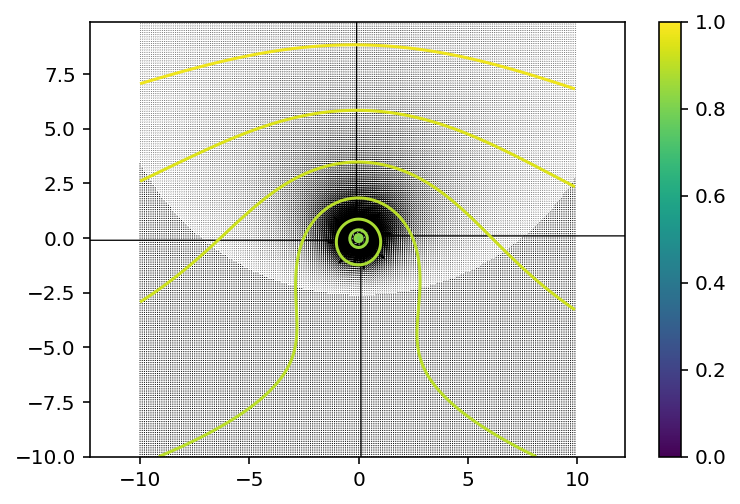

In [65]:
dx = dz = 0.1
xa = np.arange(-10, 10, dx)
za = np.arange(-10, 10, dz)

x, z = np.meshgrid(xa, za)

u_inf = 73
alpha = -1
c=4
al0=-4
cl = 2*np.pi*(alpha-al)

Gamma = 0.5*u_inf*c*cl


psi = uniform_flow(u_inf, alpha) + vortex(Gamma,0,0)


u,w = findvelocities(psi)

plt.axis('equal')
plt.contour(x, z, psi, 50)
plt.quiver(x,z,u,w)
plt.colorbar()
plt.plot()

dx = dz = 0.01
radius = 0.001
xa = np.arange(7-radius, 7+radius+dx, dx)
za = np.arange(0-radius, 0+radius+dz, dz)

x, z = np.meshgrid(xa, za)
psi = uniform_flow(u_inf, alpha) + vortex(Gamma,0,0)

u, w = findvelocities(psi)
u=np.mean(u)
w=np.mean(w)
np.arctan2(u, w)